# Exploring the Weather in Athens
In this assignment I will explore the weather in Athens for years 1955 up to 2020. The aim of this analysis is to examine changes in the temprature and general if there is a climate change through the years by analyse the temprature and the precipitation.

---
> Name: Taklakoglou Chidiroglou Argyrios <br />
> Student ID : f2822114 <br />
> Msc student in Business Analytics <br />
> Athens University of Economics and Business <br />

Ι start by importing the packages Ι'll need.

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import matplotlib

import seaborn as sns

%matplotlib inline

I also `import os` in order to use the `getwd()` command to see the path in which I am working on.

In [2]:
import os
cwd = os.getcwd()
cwd

#I can also use the following command to set the working directory I want.
#os.chdir()

'C:\\Users\\argir'

Due to the fact that I will work with 2 datasets and I will change some values in some rows or I will exclude some rows, I run this command so as to be able to observe all the data in each dataframe and check if the results after its modification are what I expected to get.

In [3]:
#os.chdir()

In [4]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)

# Obtaining the Data

I'll proceed to download the data I'll be using. I will work with data covering the period from 1955 to 2020. The data will be obtained from two sources:

* Data downloaded from the National Oceanic and Atmospheric Administration's National Centers for Environmental Information here will use the data from the Hellinikon weather station because I want to analyse the whether in Athens. https://www.ncdc.noaa.gov/cdo-web/search 

* Data download from https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f in order to fill sum missing values in some columns in the first dataset for the period from 2010 to 2019.

In [5]:
data_filename = "2866131.csv"
data = pd.read_csv(data_filename)

In [6]:
data

,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,GR000016716,"HELLINIKON, GR",1955-01-01,0.00,NaN,NaN,65.0,50.0
1,GR000016716,"HELLINIKON, GR",1955-01-02,0.08,NaN,NaN,58.0,45.0
2,GR000016716,"HELLINIKON, GR",1955-01-03,0.00,NaN,NaN,60.0,49.0
3,GR000016716,"HELLINIKON, GR",1955-01-04,0.00,NaN,NaN,66.0,45.0
4,GR000016716,"HELLINIKON, GR",1955-01-05,0.00,NaN,NaN,64.0,47.0
...,...,...,...,...,...,...,...,...
23246,GR000016716,"HELLINIKON, GR",2020-12-27,0.00,NaN,62.0,NaN,NaN
23247,GR000016716,"HELLINIKON, GR",2020-12-28,0.26,NaN,59.0,65.0,53.0
23248,GR000016716,"HELLINIKON, GR",2020-12-29,0.00,NaN,61.0,68.0,54.0
23249,GR000016716,"HELLINIKON, GR",2020-12-30,0.00,NaN,62.0,68.0,59.0


Ι run `.dtypes` command in order to check the type of its variable.

In [7]:
data.dtypes

STATION     object
NAME        object
DATE        object
PRCP       float64
SNWD       float64
TAVG       float64
TMAX       float64
TMIN       float64
dtype: object

I observe that the `DATE` variable isn't in datetime type. So I convert it in the datetime in order to be able to manipulate the data with date column easier.

In [8]:
data['DATE'] = pd.to_datetime(data['DATE'])
data.dtypes

STATION            object
NAME               object
DATE       datetime64[ns]
PRCP              float64
SNWD              float64
TAVG              float64
TMAX              float64
TMIN              float64
dtype: object

I want to understand better the data and understand if there are many NAs or if there are outliers in the dataset. For this reason I execute the commands describe and unique

In [9]:
data.describe()

,PRCP,SNWD,TAVG,TMAX,TMIN
count,22773.000000,30.000000,20940.000000,22307.000000,22418.000000
mean,0.039799,6.006667,64.884575,72.225669,58.047596
std,0.182426,13.950922,12.471614,13.309235,11.631550
min,0.000000,0.400000,28.000000,34.000000,24.000000
25%,0.000000,0.400000,55.000000,62.000000,49.000000
50%,0.000000,0.800000,64.000000,71.000000,58.000000
75%,0.000000,1.600000,76.000000,84.000000,68.000000
max,5.590000,48.800000,95.000000,108.000000,87.000000


From the above table, I can see that there are not outliers in the dataset. The min and max value for its variable are in its right range.

In [10]:
print(data.STATION.unique())
print(data.NAME.unique())
print(data.PRCP.unique())
print(data.SNWD.unique())
print(data.TAVG.unique())

['GR000016716']
['HELLINIKON, GR']
[0.   0.08 0.12 0.02 0.06 0.22 0.43 1.09 0.63 0.14 0.37 0.19 0.59 0.48
 0.11 0.03 0.01 0.04 0.71 0.13 0.09 0.25 1.15 0.61 0.17 0.51 0.98 0.7
 1.59 0.32 1.68 0.56 0.58 1.54 0.15 0.57 0.46 0.88 1.02 0.1  0.31 0.26
 0.05 0.2  0.27 0.24 0.39 0.45 0.07 0.73 0.52 0.3  0.36 0.55 0.28 0.76
 0.35 0.16 0.18 3.16 1.05 0.65 0.34 0.69 0.23 2.63 0.29 0.38 0.85 1.88
 0.79 0.41 0.78 0.49 0.94 0.5   nan 0.75 0.67 0.87 1.07 0.83 0.53 0.72
 0.21 1.11 1.71 1.8  0.54 0.42 0.4  1.19 0.6  0.33 0.91 0.95 1.   1.28
 1.33 0.68 1.36 1.01 1.08 1.1  0.8  0.44 1.56 0.81 1.13 1.16 2.   0.62
 1.5  0.66 0.9  0.84 1.4  0.47 1.67 1.29 1.46 1.2  2.04 0.64 1.41 2.76
 1.17 1.98 2.53 1.89 1.38 0.77 1.23 1.97 1.39 2.15 1.69 1.21 0.93 3.19
 1.44 1.12 1.53 1.84 0.86 1.03 2.17 2.02 1.81 1.66 1.37 1.32 1.72 3.21
 0.96 1.63 0.89 3.63 1.99 1.04 0.74 1.75 3.13 1.51 1.57 1.31 0.92 0.82
 5.59 3.79 3.88 1.74 1.61 1.06 3.81 0.97 2.35 1.43 2.44 2.41 1.34 1.14
 1.7  3.47 1.27 2.8  1.18 3.28 1.22 2.72 1.

I observe that the variables PRCP, SNWD and TAVG contain NA values

To be more accurate about the amount of the missing values, I will run the command `.sum()` which counts the missing values in each column and also the command `.sum()/len(data)` which returns the % of the total values that are NAs.

In [11]:
data.isnull().sum()

STATION        0
NAME           0
DATE           0
PRCP         478
SNWD       23221
TAVG        2311
TMAX         944
TMIN         833
dtype: int64

In [12]:
data.isnull().sum()/len(data)

STATION    0.000000
NAME       0.000000
DATE       0.000000
PRCP       0.020558
SNWD       0.998710
TAVG       0.099394
TMAX       0.040600
TMIN       0.035826
dtype: float64

I will explore the 2nd dataset in order to find out which variables are identical to the variables in the 1st dataframe because my aim is to fill some of the NA values in the 1st dataframe(data) with the values of the second dataframe(complementary_data) for the years 2010 up to 2019.

In [13]:
colnames = ['DATE', 'TAVG', 'TMAX', 'TMIN', 'MEAN_HUMID', 'MAX_HUMID', 'MIN_HUMID', 'MEAN_ATM_PRES', 'MAX_ATM_PRES', 'MIN_ATM_PRES', 'PRCP', 'WIND_SPEED', 'OTHER_VAR', 'DIRECTION']

In [14]:
data_filename2 = "athens.csv"
complementary_data = pd.read_csv(data_filename2, names=colnames)

In [15]:
complementary_data

,DATE,TAVG,TMAX,TMIN,MEAN_HUMID,MAX_HUMID,MIN_HUMID,MEAN_ATM_PRES,MAX_ATM_PRES,MIN_ATM_PRES,PRCP,WIND_SPEED,OTHER_VAR,DIRECTION
0,2010-01-01,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
1,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
3,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
4,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2019-12-27,10.1,10.2,10.0,60.3,79,44,1018.4,1019.9,1016.8,0.0,2.9,NE,8.0
3648,2019-12-28,8.3,8.4,8.2,60.9,82,46,1016.0,1017.2,1014.2,7.2,4.3,NE,12.8
3649,2019-12-29,6.4,6.5,6.4,73.4,82,66,1017.6,1018.9,1016.5,3.4,10.6,NNE,24.5
3650,2019-12-30,4.0,4.0,3.9,83.9,90,65,1020.0,1024.2,1016.6,12.4,5.1,NE,15.0


Ι run `.dtypes` command in order to check the type of its variable.

In [16]:
complementary_data.dtypes

DATE              object
TAVG              object
TMAX              object
TMIN              object
MEAN_HUMID       float64
MAX_HUMID          int64
MIN_HUMID          int64
MEAN_ATM_PRES    float64
MAX_ATM_PRES     float64
MIN_ATM_PRES     float64
PRCP             float64
WIND_SPEED       float64
OTHER_VAR         object
DIRECTION        float64
dtype: object

I observe that the type of the variables DATE, TAVG, TMAX and TMIN are not correct. But if I try to change them, to datetime and float respectively, an error occured. Maybe I can't convert them maybe because somewhere there is a value that can't be reformed to float.

In [17]:
#complementary_data['DATE'] = pd.to_datetime(complementary_data['DATE'])

#complementary_data['TAVG'] = complementary_data['TAVG'].astype('float')
#complementary_data['TMAX'] = complementary_data['TMAX'].astype('float')
#complementary_data['TMIN'] = complementary_data['TMIN'].astype('float')

In order to investigate this I can print the unique values of its variable in the dataframe.

In [18]:
print(complementary_data.TAVG.unique())
print(complementary_data.TMIN.unique())
print(complementary_data.TMAX.unique())

['17.9' '15.6' '13.5' '9.5' '13.4' '16.8' '16.6' '16.1' '17.2' '14.3'
 '12.3' '12.6' '12.4' '11.1' '11.8' '10.0' '10.2' '10.3' '8.7' '9.0' '8.0'
 '6.5' '5.6' '4.5' '4.7' '5.9' '12.5' '13.0' '13.9' '14.1' '7.9' '5.1'
 '8.4' '9.1' '11.9' '11.5' '10.6' '14.7' '14.0' '14.2' '12.7' '13.7'
 '15.8' '16.4' '17.1' '18.6' '14.5' '12.8' '15.0' '14.9' '15.5' '15.1'
 '16.3' '9.3' '11.2' '10.1' '10.7' '11.6' '13.2' '13.8' '14.8' '16.7'
 '17.7' '16.2' '16.9' '17.5' '16.5' '18.3' '17.3' '17.8' '15.9' '16.0'
 '18.5' '20.6' '21.1' '20.1' '19.0' '19.6' '19.3' '18.8' '20.0' '17.6'
 '19.2' '20.2' '20.7' '21.9' '22.4' '23.0' '23.3' '24.7' '24.2' '25.2'
 '22.3' '20.8' '20.5' '19.7' '19.9' '18.1' '18.9' '22.2' '24.1' '26.0'
 '26.6' '27.0' '28.0' '24.9' '23.4' '20.9' '21.6' '24.4' '24.3' '26.4'
 '28.7' '29.3' '29.0' '29.7' '30.8' '31.7' '32.0' '27.5' '27.6' '26.7'
 '24.5' '23.1' '23.7' '25.9' '28.2' '29.2' '28.9' '29.8' '26.5' '26.3'
 '27.2' '30.9' '30.2' '31.8' '32.1' '31.3' '27.9' '28.3' '28.5' '31.0'
 '31.6

I see that in variables TAVG, TMIN and TMAX there is a value '---' that obviously it's not possible to be converted to float. So I replace '---' to NA and then I convert the dtype of these variables.

In [19]:
complementary_data['TAVG'].replace({'---': None},inplace =True)
complementary_data['TMAX'].replace({'---': None},inplace =True)
complementary_data['TMIN'].replace({'---': None},inplace =True)

In [20]:
complementary_data['TAVG'] = complementary_data['TAVG'].astype('float')
complementary_data['TMAX'] = complementary_data['TMAX'].astype('float')
complementary_data['TMIN'] = complementary_data['TMIN'].astype('float')

complementary_data['DATE'] = pd.to_datetime(complementary_data['DATE'])

In [21]:
complementary_data.dtypes

DATE             datetime64[ns]
TAVG                    float64
TMAX                    float64
TMIN                    float64
MEAN_HUMID              float64
MAX_HUMID                 int64
MIN_HUMID                 int64
MEAN_ATM_PRES           float64
MAX_ATM_PRES            float64
MIN_ATM_PRES            float64
PRCP                    float64
WIND_SPEED              float64
OTHER_VAR                object
DIRECTION               float64
dtype: object

I run again the command `.sum()` which counts the missing values in each column of the dataframe.

In [22]:
complementary_data.isnull().sum()

DATE             0
TAVG             3
TMAX             3
TMIN             3
MEAN_HUMID       0
MAX_HUMID        0
MIN_HUMID        0
MEAN_ATM_PRES    0
MAX_ATM_PRES     0
MIN_ATM_PRES     0
PRCP             0
WIND_SPEED       0
OTHER_VAR        0
DIRECTION        0
dtype: int64

Again I execute the commands describe because I want to understand better the data and understand if there are outliers in the dataset.

In [23]:
complementary_data.describe()

,TAVG,TMAX,TMIN,MEAN_HUMID,MAX_HUMID,MIN_HUMID,MEAN_ATM_PRES,MAX_ATM_PRES,MIN_ATM_PRES,PRCP,WIND_SPEED,DIRECTION
count,3649.000000,3649.000000,3649.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000
mean,19.443245,19.543574,19.345574,60.689923,75.160186,45.710022,1015.309173,1017.351232,1013.219962,1.255531,4.609693,11.955148
std,7.143639,7.154859,7.132787,12.752247,12.016278,13.018642,6.104613,5.996034,6.391040,4.993957,3.227490,6.311313
min,0.800000,0.900000,0.700000,26.300000,38.000000,13.000000,992.300000,999.400000,983.400000,0.000000,0.200000,2.000000
25%,13.700000,13.800000,13.600000,50.675000,67.000000,36.000000,1011.300000,1013.100000,1009.300000,0.000000,2.300000,7.500000
50%,18.900000,19.000000,18.800000,61.300000,77.000000,45.000000,1014.600000,1016.500000,1012.700000,0.000000,3.600000,10.300000
75%,25.800000,25.900000,25.700000,70.700000,85.000000,55.000000,1019.200000,1021.200000,1017.100000,0.000000,6.100000,15.100000
max,35.300000,35.500000,35.200000,90.100000,96.000000,85.000000,1037.100000,1039.400000,1036.300000,97.000000,23.200000,46.300000


I observe that the the values in the variables TAVG TMAX and TMIN in two dataframes are totally different. Having read the containt of these two links (the first for the dataframe data and the second fot the for the complementary_data)

https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf?fbclid=IwAR0R7aHMLLlSbFiFj-31i3VFBfkSLsorLt-EZxSjOA9UyXdGsnCA-Ma2I-k
https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f
I understand that in the first dataframe the tempratures are in fahrenheit and in the 2nd dataset there are in celsius. So I will convert fahrenheit to celsius in the first dataframe.

In [24]:
data['TAVG'] = ((data['TAVG'] - 32) * 5/9).round(1)
data['TMAX'] = ((data['TMAX'] - 32) * 5/9).round(1)
data['TMIN'] = ((data['TMIN'] - 32) * 5/9).round(1)

Because I don't need the columns `STATION, NAME and SNWD` from the first dataframe and the columns 
`MEAN_HUMID, MAX_HUMID, MIN_HUMID, MEAN_ATM_PRES, MAX_ATM_PRES, MIN_ATM_PRES, WIND_SPEED, OTHER_VAR and DIRECTION` from the second dataframe, I exlude them.

In [25]:
data = data.drop(columns=['STATION', 'NAME', 'SNWD'])

In [26]:
complementary_data = complementary_data[['DATE', 'PRCP', 'TAVG', 'TMAX', 'TMIN']]

My thought was to fill the NAs on the first dataframe from the second with commands 

```python
COLS = ['TAVG', 'TMIN', 'TMAX', 'PRCP']
data = data.fillna(complementary_data.set_index('DATE').reindex(data['DATE'])[COLS].reset_index(drop=True))
```

but I realised that I lose too much information-dates for some years, because the first dataframe doesn't contain all the dates for some years. So it wasn't a good idea to fill the NAs "matching" the dataframes on DATE column.

My second thought was to extract 2 subsets from the first dataset(data).The first subset contains the data from 1/1/1955 up to 31/12/2009 and the 2nd subset contains data from 1/1/2020 up to 31/12/2020. My thought is to combine the subsets with the 2nd dataframe(complementary_data) so as to have as many information as possible for the variables I am interesting in.

The first step I had to do to implement this idea, is to find the rows corresponding to dates 1/1/2010 and 31/12/2019 because I want to subset the rows before 1/1/2010 and after 31/12/2019 from the dataframe data. 

In [27]:
print(data[data['DATE'] == '2010-01-01'].index.values)
print(data[data['DATE'] == '2019-12-31'].index.values)

[20086]
[22884]


In [28]:
data_subset_before = data[data.index < 20086]
data_subset_before

,DATE,PRCP,TAVG,TMAX,TMIN
0,1955-01-01,0.00,NaN,18.3,10.0
1,1955-01-02,0.08,NaN,14.4,7.2
2,1955-01-03,0.00,NaN,15.6,9.4
3,1955-01-04,0.00,NaN,18.9,7.2
4,1955-01-05,0.00,NaN,17.8,8.3
...,...,...,...,...,...
20081,2009-12-27,0.00,17.8,18.3,15.0
20082,2009-12-28,0.06,16.1,NaN,NaN
20083,2009-12-29,0.00,13.9,16.7,NaN
20084,2009-12-30,0.00,13.3,17.2,8.9


In [29]:
data_subset_after = data[data.index > 22884]
data_subset_after

,DATE,PRCP,TAVG,TMAX,TMIN
22885,2020-01-01,0.00,8.3,11.7,NaN
22886,2020-01-02,0.06,7.2,8.9,3.9
22887,2020-01-03,0.13,8.9,11.1,6.7
22888,2020-01-04,0.00,10.6,NaN,5.6
22889,2020-01-05,0.00,9.4,13.3,NaN
...,...,...,...,...,...
23246,2020-12-27,0.00,16.7,NaN,NaN
23247,2020-12-28,0.26,15.0,18.3,11.7
23248,2020-12-29,0.00,16.1,20.0,12.2
23249,2020-12-30,0.00,16.7,20.0,15.0


So I am ready to proceed in my analysis with the new dataframe data after the concatenation of thw 2 subsets and the complementary_data.

In [30]:
data = pd.concat([data_subset_before, complementary_data, data_subset_after], ignore_index=True)
data

,DATE,PRCP,TAVG,TMAX,TMIN
0,1955-01-01,0.00,NaN,18.3,10.0
1,1955-01-02,0.08,NaN,14.4,7.2
2,1955-01-03,0.00,NaN,15.6,9.4
3,1955-01-04,0.00,NaN,18.9,7.2
4,1955-01-05,0.00,NaN,17.8,8.3
...,...,...,...,...,...
24099,2020-12-27,0.00,16.7,NaN,NaN
24100,2020-12-28,0.26,15.0,18.3,11.7
24101,2020-12-29,0.00,16.1,20.0,12.2
24102,2020-12-30,0.00,16.7,20.0,15.0


### Deviation of Summer Temperatures

The first analysis I will do is to make a graph showing the mean summer temperature deviation from a baseline of 1974-1999 with
a line that runs through the graph. This line is a 10 years rolling avarege of the deviation from the mean.

To beggin with, I will extract only the rows reffering to summer months. So I select a subset containing the rows for the months June, July and August for the years 1995 up to 2020.

In [31]:
data_all_years = data.loc[((data['DATE'].dt.month == 6) | (data['DATE'].dt.month == 7) | (data['DATE'].dt.month == 8))]
data_all_years

,DATE,PRCP,TAVG,TMAX,TMIN
151,1955-06-01,0.0,NaN,26.1,17.8
152,1955-06-02,0.0,NaN,26.7,17.2
153,1955-06-03,0.0,NaN,26.1,17.2
154,1955-06-04,0.0,NaN,26.7,18.9
155,1955-06-05,0.0,NaN,27.2,17.8
...,...,...,...,...,...
23977,2020-08-27,0.0,28.3,34.4,23.3
23978,2020-08-28,0.0,29.4,35.6,22.2
23979,2020-08-29,0.0,29.4,35.6,22.8
23980,2020-08-30,0.0,27.8,34.4,22.2


Because I want to take the differences from the mean summer temprature for the years 1974 up to 1999, I select a second subset containing only the rows for June, July and August for these years.

In [32]:
data_baseline = data.loc[((data['DATE'].dt.month == 6) | (data['DATE'].dt.month == 7) | (data['DATE'].dt.month == 8)) \
                  & ((data['DATE'].dt.year >=1974) & (data['DATE'].dt.year <=1999))]
data_baseline

,DATE,PRCP,TAVG,TMAX,TMIN
7091,1974-06-01,0.00,22.8,26.7,17.2
7092,1974-06-02,0.00,23.3,27.8,20.0
7093,1974-06-03,0.01,22.2,26.7,20.0
7094,1974-06-04,0.10,21.1,24.4,18.3
7095,1974-06-05,0.00,23.9,31.7,18.3
...,...,...,...,...,...
16309,1999-08-27,0.00,24.4,29.4,21.1
16310,1999-08-28,0.00,24.4,29.4,20.6
16311,1999-08-29,0.00,25.6,30.0,20.0
16312,1999-08-30,0.00,26.1,31.7,21.1


With the command `.goupby`, I get first the mean temperature for the summer months for its year for all the years and second the mean temperature for the summer months for the years 1974 up to 1995.

In [33]:
TAVG_per_summer_all_years = pd.DataFrame(data_all_years.groupby(data_all_years['DATE'].dt.year).agg({'TAVG' : np.mean}))
TAVG_per_summer_all_years

,TAVG
DATE,
1955,NaN
1956,NaN
1957,28.103226
1958,27.042391
1959,NaN
...,...
2016,28.691304
2017,28.530435
2018,27.920652


In [34]:
TAVG_per_summer = pd.DataFrame(data_baseline.groupby(data_baseline['DATE'].dt.year).agg({'TAVG' : np.mean}))
TAVG_per_summer

,TAVG
DATE,
1974,26.504651
1975,25.934783
1976,24.844565
1977,26.573913
1978,25.744565
1979,26.131522
1980,25.569565
1981,25.541304
1982,25.034783


The purpose is to calculate the difference of its year's summer mean(for all years), from the mean of all summer means for years 1974 up to 1999.

So with the command `.mean()` I get the mean of all summer means for years 1974 up to 1999. This is the number I compare with the mean summer temperature for its year(1955-2020)

In [35]:
total_summer_mean = TAVG_per_summer.mean()
total_summer_mean

TAVG    26.229234
dtype: float64

The difference contain the results of this subtraction. The difference will define whether the bar for it's row will be above the x'x axis or not and height of each bar in the plot.

In [36]:
difference = pd.DataFrame(TAVG_per_summer_all_years - total_summer_mean)
difference

,TAVG
DATE,
1955,NaN
1956,NaN
1957,1.873992
1958,0.813157
1959,NaN
...,...
2016,2.462070
2017,2.301201
2018,1.691418


In [37]:
#difference.TAVG
#difference.index

With the command `.rolling()` I calculate the line that runs through the graph. `Window =10` means that is the 10 years rolling avarege. I add `min_periods=1` , because otherwise the first results will contain NAs.

In [38]:
rolmean = pd.Series(difference['TAVG']).rolling(window=10, min_periods=1).mean()
rolmean

DATE
1955         NaN
1956         NaN
1957    1.873992
1958    1.343574
1959    1.343574
          ...   
2016    2.014490
2017    2.045226
2018    2.020335
2019    2.098378
2020    1.968161
Name: TAVG, Length: 66, dtype: float64

In this step I will visualize the data in order to infer from the results.

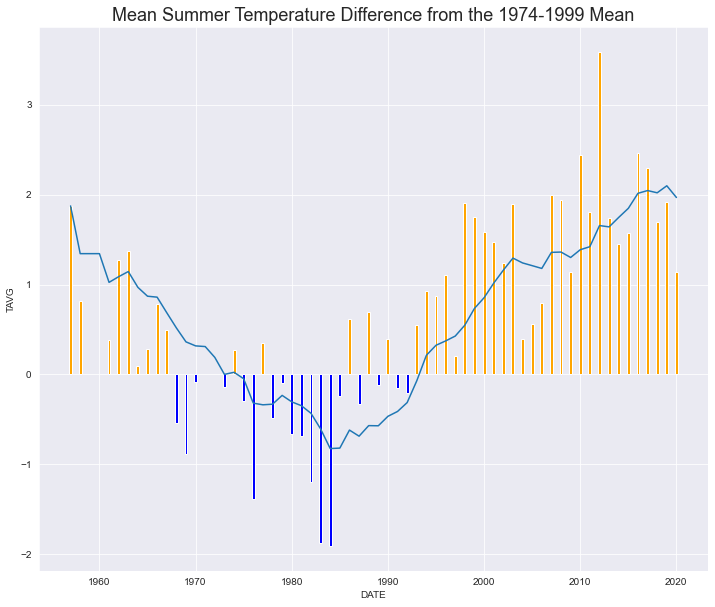

In [39]:
#The Plot

sns.set_style('darkgrid')
colormat=np.where(difference['TAVG']>0, 'orange','blue')
fig, ax2 = plt.subplots(figsize=(12, 10))
plt.title("Mean Summer Temperature Difference from the 1974-1999 Mean", fontsize=18)
fig = plt.bar(difference.index, difference['TAVG'], width=0.3, color=colormat)
ax2 = sns.lineplot(data = rolmean, sort = False)

From the above plot, I comprehend that the the mean summer temprature in years 1968, 1969, 1975, 1976, 1978 up to 1985, 1987 and 1992  was lesser than the mean of all summer means for years 1974 up to 1999. I can also see that in last years there is a upward trend in the mean summer temprature. That means that maybe as the years go by, the summers may be hotter.

### Evolution of Daily Temperatures

I will plot the daily Temperature for every year from 1955 up to 2020. The aim of the plot is to depict weather the temperature is increasing as the years go by or not.


I will get the average temperature for each year for the full period from 1955 to 2020. I will then create a plot showing the daily temperature for each year. The line corresponding to each year will be smoothed by using a 30 days rolling average. The lines are colored from light orange to dark orange, progressing through the years in ascending order. On that plot I will overlay a black line showing the average daily temperature for the baseline period of 1974-1999. The line will also be smoothed usng a 30 days rolling average.

To begging with, I make a copy of the data because I will include two more columns.

In [40]:
copy_data = data.copy()

The first column I add into the dataframe will contain the 30 days rolling average and the second column will contain the corresponding year of it's row for the years 1955 up to 2020

In [41]:
copy_data['ROL'] = copy_data['TAVG'].rolling(window = 30, min_periods = 1).mean()

In [42]:
copy_data['YEAR'] = copy_data['DATE'].dt.year

I observe the copy_data to see the changes in the dataframe. There are NAs in ROL column beacause from 1/1/55 up to 30/6/57 and from 30/1/59 up to 31/12/60 there are NAs in TAVG column. I observed that whether I execute the command 
```python
copy_data = copy_data.dropna(subset = ['TAVG'])
```
or not, the plot have no difference.

In [43]:
copy_data

,DATE,PRCP,TAVG,TMAX,TMIN,ROL,YEAR
0,1955-01-01,0.00,NaN,18.3,10.0,NaN,1955
1,1955-01-02,0.08,NaN,14.4,7.2,NaN,1955
2,1955-01-03,0.00,NaN,15.6,9.4,NaN,1955
3,1955-01-04,0.00,NaN,18.9,7.2,NaN,1955
4,1955-01-05,0.00,NaN,17.8,8.3,NaN,1955
...,...,...,...,...,...,...,...
24099,2020-12-27,0.00,16.7,NaN,NaN,14.086667,2020
24100,2020-12-28,0.26,15.0,18.3,11.7,14.160000,2020
24101,2020-12-29,0.00,16.1,20.0,12.2,14.160000,2020
24102,2020-12-30,0.00,16.7,20.0,15.0,14.216667,2020


The next thing I do is to make another copy from my data name it data_baseline_Q3 to make the black line in the plot which is the baseline period of 1974-1999.

In [44]:
data_baseline_Q3 = data.copy()

I want to keep only the column DATE and TAVG because only these two columns are needed to evaluate the baseline.

In [45]:
data_baseline_Q3 = data_baseline_Q3[['DATE', 'TAVG']]

In [46]:
data_baseline_Q3

,DATE,TAVG
0,1955-01-01,NaN
1,1955-01-02,NaN
2,1955-01-03,NaN
3,1955-01-04,NaN
4,1955-01-05,NaN
...,...,...
24099,2020-12-27,16.7
24100,2020-12-28,15.0
24101,2020-12-29,16.1
24102,2020-12-30,16.7


The idea again is to find the rows corresponding to dates 1/1/74 and 31/12/99 because I want to subset the rows for these dates.

In [47]:
print(data_baseline_Q3[data_baseline_Q3['DATE'] == '1974-01-01'].index.values)
print(data_baseline_Q3[data_baseline_Q3['DATE'] == '1999-12-31'].index.values)

[6940]
[16435]


I subset the rows for the dates 1/1/74 up to 31/12/99 in order to make the baseline.

In [48]:
data_baseline_Q3 = data_baseline_Q3[6940:16436]
data_baseline_Q3

,DATE,TAVG
6940,1974-01-01,11.7
6941,1974-01-02,13.9
6942,1974-01-03,12.2
6943,1974-01-04,10.6
6944,1974-01-05,9.4
...,...,...
16431,1999-12-27,15.6
16432,1999-12-28,16.7
16433,1999-12-29,15.0
16434,1999-12-30,13.3


The column I add into the dataframe will contain the 30 days rolling average for the years 1974 up to 1999 so as to create the baseline.

In [49]:
data_baseline_Q3['ROL'] = data_baseline_Q3['TAVG'].rolling(window = 30, min_periods = 1).mean()

C:\Users\argir\AppData\Local\Temp/ipykernel_11592/1169906434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_baseline_Q3['ROL'] = data_baseline_Q3['TAVG'].rolling(window = 30, min_periods = 1).mean()


In [50]:
data_baseline_Q3

,DATE,TAVG,ROL
6940,1974-01-01,11.7,11.700000
6941,1974-01-02,13.9,12.800000
6942,1974-01-03,12.2,12.600000
6943,1974-01-04,10.6,12.100000
6944,1974-01-05,9.4,11.560000
...,...,...,...
16431,1999-12-27,15.6,13.316667
16432,1999-12-28,16.7,13.540000
16433,1999-12-29,15.0,13.670000
16434,1999-12-30,13.3,13.743333


The final step for this analysis is to make the plot in order to find insights from the data.

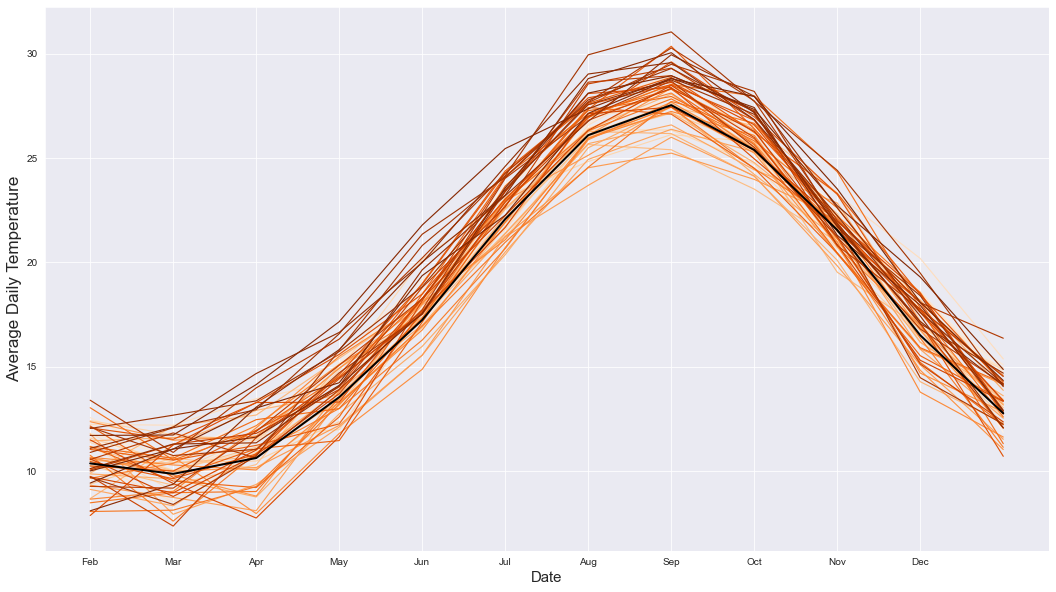

In [51]:
months = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, ax = plt.subplots(figsize=(18, 10))
fig = sns.lineplot(x=copy_data['DATE'].dt.month, y=copy_data['ROL'], data=copy_data, ci = None,  hue= 'YEAR', linewidth=1.15, palette='Oranges', legend = False )
plt.xlabel("Date", fontsize=15)
plt.ylabel("Average Daily Temperature", fontsize=17)
fig.set_xticks(range(12))
fig.set_xticklabels(months)
ax = sns.lineplot(x=data_baseline_Q3['DATE'].dt.month, y=data_baseline_Q3['ROL'], data = data_baseline_Q3, ci = None, color='black', linewidth=2)
pass

From the above plot I can see that in the older years in the dataset(light orange color) there were lower temperatures in all the year round than the earlier years(dark orange-brown color). So I clearly understand that over the years the temperature tend to be higher not only during the summer months but all year round. Maybe this is caused from greenhouse effect problem.

### Extreme Temperature Events

Another mesure used by climatologists is the number of extreme events. 
In this analysis, extreme events are defined as those beyond 10% from the baseline. 
I will count the number of extreme temperature events per year, compared to the baseline of 1974-1999.
In the plot the vertical axis will be the percentage of extreme heat events calculated over the number of observations for each year. The gray line in the middle will be the average percentage of extreme tempearture events of the baseline.
The colour blue is used for those years where the percentage is below the baseline, otherwise the colour is orange.

Initially I will make a copy from dataframe data because in this analysis I 

---

will add columns and I will also exlude some rows.

In [52]:
copy_data2 = data.copy()

In order to make the baseline, I should have a dataframe containing only the dates from 1/1/1974 up to 31/12/1999.

In [53]:
data_baseline_Q4 = copy_data2.loc[((copy_data2['DATE'].dt.year >=1974) & (copy_data2['DATE'].dt.year <=1999))]
data_baseline_Q4.reset_index(drop=True)

,DATE,PRCP,TAVG,TMAX,TMIN
0,1974-01-01,0.00,11.7,12.8,10.0
1,1974-01-02,0.00,13.9,15.6,11.1
2,1974-01-03,0.39,12.2,16.1,10.6
3,1974-01-04,0.00,10.6,12.8,8.3
4,1974-01-05,0.00,9.4,11.1,8.3
...,...,...,...,...,...
9491,1999-12-27,0.00,15.6,18.9,10.6
9492,1999-12-28,0.00,16.7,20.0,12.8
9493,1999-12-29,0.00,15.0,18.3,14.4
9494,1999-12-30,0.00,13.3,16.7,8.3


Now I will create 2 new columns in the dataframe data_baseline_Q4 containing the month and the year in every row. This will help me when I will do the pivot table and more precisely when I will execute the `reset_index()` command. I tried to do pass them as dt.month and dt.day but when I did the `reset_index()` an error occured.

In [54]:
data_baseline_Q4['MONTH'] = data_baseline_Q4['DATE'].dt.month

C:\Users\argir\AppData\Local\Temp/ipykernel_11592/3602574233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_baseline_Q4['MONTH'] = data_baseline_Q4['DATE'].dt.month


In [55]:
data_baseline_Q4['DAY'] = data_baseline_Q4['DATE'].dt.day

C:\Users\argir\AppData\Local\Temp/ipykernel_11592/2350163594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_baseline_Q4['DAY'] = data_baseline_Q4['DATE'].dt.day


I will open the dataframe in order to check that the changes have been applied correctly.

In [56]:
data_baseline_Q4

,DATE,PRCP,TAVG,TMAX,TMIN,MONTH,DAY
6940,1974-01-01,0.00,11.7,12.8,10.0,1,1
6941,1974-01-02,0.00,13.9,15.6,11.1,1,2
6942,1974-01-03,0.39,12.2,16.1,10.6,1,3
6943,1974-01-04,0.00,10.6,12.8,8.3,1,4
6944,1974-01-05,0.00,9.4,11.1,8.3,1,5
...,...,...,...,...,...,...,...
16431,1999-12-27,0.00,15.6,18.9,10.6,12,27
16432,1999-12-28,0.00,16.7,20.0,12.8,12,28
16433,1999-12-29,0.00,15.0,18.3,14.4,12,29
16434,1999-12-30,0.00,13.3,16.7,8.3,12,30


The next step in order to create the baseline, is to create a pivot table for day and month with the mean aggregation for TAVG column. As a result, I will end up having the mean value of TAVG(Avarage Temperature) for each combination day/month for the years 1974 - 1999.

In [57]:
pivot_baseline = pd.DataFrame(data_baseline_Q4.pivot_table(index=('DAY', 'MONTH'), aggfunc='mean')['TAVG'])
pivot_baseline

TAVG
DAY MONTH           
1   1      10.369231
    2       9.226923
    3      10.188462
    4      13.203846
    5      16.903846
...              ...
31  5      21.632000
    7      27.307692
    8      25.253846
    10     16.288462
    12     10.980769

[366 rows x 1 columns]

In order to create the column DAY/MONTH, that will help me when I will do the merge between the 'full' dataset and the pivot_baseline, I have to execute the command `.reset_index(inplace=True)` so as to convert the indexes of days and months to columns.

In [58]:
pivot_baseline.reset_index(inplace=True)
pivot_baseline

,DAY,MONTH,TAVG
0,1,1,10.369231
1,1,2,9.226923
2,1,3,10.188462
3,1,4,13.203846
4,1,5,16.903846
...,...,...,...
361,31,5,21.632000
362,31,7,27.307692
363,31,8,25.253846
364,31,10,16.288462


In this step I will create a new column named DAY/MONTH in the pivot_baseline dataframe (the dataframe that the years 1974 - 1999) containing the day/month for the column DAY and column MONTH in it's row so as to use this column for the merge. Then I run the dataframe in order to check that the new column contain the values I want.

In [59]:
pivot_baseline['DAY/MONTH'] = pivot_baseline['DAY'].map(str) + '/' + pivot_baseline['MONTH'].map(str) 
pivot_baseline

,DAY,MONTH,TAVG,DAY/MONTH
0,1,1,10.369231,1/1
1,1,2,9.226923,1/2
2,1,3,10.188462,1/3
3,1,4,13.203846,1/4
4,1,5,16.903846,1/5
...,...,...,...,...
361,31,5,21.632000,31/5
362,31,7,27.307692,31/7
363,31,8,25.253846,31/8
364,31,10,16.288462,31/10


Due to the fact that we have defined as extreme days, those whose TAVG is beyond 10% from the baseline, I should multiply the pivot_baseline with 1.1 .

In [60]:
pivot_baseline['TAVG'] = pivot_baseline['TAVG'] * 1.1
pivot_baseline

,DAY,MONTH,TAVG,DAY/MONTH
0,1,1,11.406154,1/1
1,1,2,10.149615,1/2
2,1,3,11.207308,1/3
3,1,4,14.524231,1/4
4,1,5,18.594231,1/5
...,...,...,...,...
361,31,5,23.795200,31/5
362,31,7,30.038462,31/7
363,31,8,27.779231,31/8
364,31,10,17.917308,31/10


I check the types of the columns because I will merge on DAY/MONTH column. So I want to check if the type of DAY/MONTH column in the two dataframes is the same.

In [61]:
pivot_baseline.dtypes

DAY            int64
MONTH          int64
TAVG         float64
DAY/MONTH     object
dtype: object

Now again I will create a new column named DAY/MONTH in the "full" dataframe (the dataframe that contains all the years) containing the day/month for it's row in order to use this column for the merge. Then I run the dataframe in order to check that the new column contain the values I want.

In [62]:
copy_data2['DAY/MONTH'] = copy_data2['DATE'].dt.day.map(str) + '/' + copy_data2['DATE'].dt.month.map(str) 
copy_data2

,DATE,PRCP,TAVG,TMAX,TMIN,DAY/MONTH
0,1955-01-01,0.00,NaN,18.3,10.0,1/1
1,1955-01-02,0.08,NaN,14.4,7.2,2/1
2,1955-01-03,0.00,NaN,15.6,9.4,3/1
3,1955-01-04,0.00,NaN,18.9,7.2,4/1
4,1955-01-05,0.00,NaN,17.8,8.3,5/1
...,...,...,...,...,...,...
24099,2020-12-27,0.00,16.7,NaN,NaN,27/12
24100,2020-12-28,0.26,15.0,18.3,11.7,28/12
24101,2020-12-29,0.00,16.1,20.0,12.2,29/12
24102,2020-12-30,0.00,16.7,20.0,15.0,30/12


Again I check the types of the columns because I will merge on DAY/MONTH column and I want the type of DAY/MONTH column in the two dataframes is the same.

In [63]:
copy_data2.dtypes

DATE         datetime64[ns]
PRCP                float64
TAVG                float64
TMAX                float64
TMIN                float64
DAY/MONTH            object
dtype: object

So now it's time to merge the full dataset `copy_data2` and the `pivot_baseline` on DAY/MONTH column and I will create a new column containing the TAVG from `pivot_baseline` . I will do this because I want to compare each TAVG value in the full datagrame with the TAVG from the baseline.

In [64]:
copy_data2 = pd.merge(copy_data2,pivot_baseline[['DAY/MONTH','TAVG']],on='DAY/MONTH', how='left')
copy_data2

,DATE,PRCP,TAVG_x,TMAX,TMIN,DAY/MONTH,TAVG_y
0,1955-01-01,0.00,NaN,18.3,10.0,1/1,11.406154
1,1955-01-02,0.08,NaN,14.4,7.2,2/1,11.765769
2,1955-01-03,0.00,NaN,15.6,9.4,3/1,11.232692
3,1955-01-04,0.00,NaN,18.9,7.2,4/1,10.555769
4,1955-01-05,0.00,NaN,17.8,8.3,5/1,10.953462
...,...,...,...,...,...,...,...
24099,2020-12-27,0.00,16.7,NaN,NaN,27/12,10.788462
24100,2020-12-28,0.26,15.0,18.3,11.7,28/12,11.236923
24101,2020-12-29,0.00,16.1,20.0,12.2,29/12,11.863077
24102,2020-12-30,0.00,16.7,20.0,15.0,30/12,12.480769


I check the shape of the dataframe because I want to exclude some rows. Thus is way to understand how many rows there are before and after the cleaning. Thus I can see how many rows have been deleted.

In [65]:
copy_data2.shape

(24104, 7)

Later I unsterstood that the NAs affect the output of the "final results", so it's prefferable to exclude now the rows which contain NA in TAVG_x column.

In [66]:
copy_data2 = copy_data2.dropna(subset = ['TAVG_x'])

Then I reset the index in order to start from 0.

In [67]:
copy_data2 = copy_data2.reset_index(drop = True)

In [68]:
copy_data2.shape

(21790, 7)

In [69]:
copy_data2

,DATE,PRCP,TAVG_x,TMAX,TMIN,DAY/MONTH,TAVG_y
0,1957-07-01,0.00,22.2,25.6,18.3,1/7,28.989231
1,1957-07-02,0.00,26.1,32.8,19.4,2/7,28.701538
2,1957-07-03,0.00,25.6,30.6,21.1,3/7,29.175385
3,1957-07-04,0.00,26.7,32.8,20.0,4/7,29.027308
4,1957-07-05,0.00,28.3,34.4,22.2,5/7,29.471538
...,...,...,...,...,...,...,...
21785,2020-12-27,0.00,16.7,NaN,NaN,27/12,10.788462
21786,2020-12-28,0.26,15.0,18.3,11.7,28/12,11.236923
21787,2020-12-29,0.00,16.1,20.0,12.2,29/12,11.863077
21788,2020-12-30,0.00,16.7,20.0,15.0,30/12,12.480769


In order to count the extreme days of each year, I create a new column containing booleans. True if the Avarage Temprature(TAVG_x) of the day is greater than the coresponding Avarage Temprature(TAVG_y) of the baseline and False if it's smaller.

In [70]:
copy_data2['result'] = copy_data2['TAVG_x'] > copy_data2['TAVG_y']
copy_data2

,DATE,PRCP,TAVG_x,TMAX,TMIN,DAY/MONTH,TAVG_y,result
0,1957-07-01,0.00,22.2,25.6,18.3,1/7,28.989231,False
1,1957-07-02,0.00,26.1,32.8,19.4,2/7,28.701538,False
2,1957-07-03,0.00,25.6,30.6,21.1,3/7,29.175385,False
3,1957-07-04,0.00,26.7,32.8,20.0,4/7,29.027308,False
4,1957-07-05,0.00,28.3,34.4,22.2,5/7,29.471538,False
...,...,...,...,...,...,...,...,...
21785,2020-12-27,0.00,16.7,NaN,NaN,27/12,10.788462,True
21786,2020-12-28,0.26,15.0,18.3,11.7,28/12,11.236923,True
21787,2020-12-29,0.00,16.1,20.0,12.2,29/12,11.863077,True
21788,2020-12-30,0.00,16.7,20.0,15.0,30/12,12.480769,True


I create a new dataframe containing the the total extreme days each year. 
The command `.loc[copy_data2.result == True]` select only the rows that have TRUE in result column(the rows in which the TAVG_x is greater than the TAVG_y (baseline) ). The command `.groupby(copy_data2['DATE'].dt.year)` make a groupby for the True values for each year and the command `.agg({'result' : 'count'}` count the total True for each year.

In [71]:
extreme_days_each_year = pd.DataFrame(copy_data2.loc[copy_data2.result == True].groupby(copy_data2['DATE'].dt.year).agg({'result' : 'count'}))
extreme_days_each_year

,result
DATE,
1957,48
1958,132
1961,133
1962,155
1963,142
...,...
2016,169
2017,170
2018,190


Now I count the total rows for each year in order later to divade the "extreme days" from the total days.
The command `.groupby(copy_data2['DATE'].dt.year)` make a groupby for each year and the command `.count()['TAVG_x']` count the total rows for each year.

In [72]:
count_total_data_each_year = pd.DataFrame(copy_data2.groupby(copy_data2['DATE'].dt.year).count()['TAVG_x'])
count_total_data_each_year

,TAVG_x
DATE,
1957,184
1958,365
1961,365
1962,365
1963,364
...,...
2016,366
2017,365
2018,365


In this step I subset the results for the total extreme days for the years 1974-1999 (the years for the baseline).

In [73]:
extreme_days_each_year_baseline = extreme_days_each_year[14:40]
extreme_days_each_year_baseline

,result
DATE,
1974,65
1975,96
1976,77
1977,116
1978,77
1979,114
1980,64
1981,93
1982,49


I subset the results for the total observations(rows) for the years 1974-1999 (the years for the baseline).

In [74]:
count_total_data_each_year_baseline = count_total_data_each_year[14:40]
count_total_data_each_year_baseline

,TAVG_x
DATE,
1974,359
1975,364
1976,365
1977,365
1978,365
1979,365
1980,366
1981,365
1982,365


In this step I devide the extreme days for each year from 1974-1999 from its total observations in order to calculate the percentage.

In [75]:
baseline_Q4 = pd.DataFrame(extreme_days_each_year_baseline['result']/count_total_data_each_year_baseline['TAVG_x'])
baseline_Q4

,0
DATE,
1974,0.181058
1975,0.263736
1976,0.210959
1977,0.317808
1978,0.210959
1979,0.312329
1980,0.174863
1981,0.254795
1982,0.134247


Now I calulate the mean of these 25 values for the years 1974-1999 in order to have the baseline for the Plot.

In [76]:
baseline_Q4 = baseline_Q4.mean()
baseline_Q4

0    0.248767
dtype: float64

I see that the baseline is equal to 0.248767

In this step I do the same process for the dataframe that contains all the years.
So I devide the extreme days for each year from 1955-2020 from its total observations in order to calculate the percentage.

In [77]:
percentage_extreme_each_year = pd.DataFrame(extreme_days_each_year['result']/count_total_data_each_year['TAVG_x'])
percentage_extreme_each_year

,0
DATE,
1957,0.260870
1958,0.361644
1961,0.364384
1962,0.424658
1963,0.390110
...,...
2016,0.461749
2017,0.465753
2018,0.520548


When I try to 'call' the 0 column from percentage_extreme_each_year, an error occurs because the name is a number and it's not callable. So I will rename the column containing the results.

In [78]:
percentage_extreme_each_year.columns=['PERCENTAGE']

The final step for this analysis is to make the plot in order to find insights from the data.

sns.set_style('darkgrid')
colormat=np.where(percentage_extreme_each_year['PERCENTAGE']>0.248767, 'orange','blue')
fig, ax2 = plt.subplots(figsize=(12, 10))
fig = plt.bar(percentage_extreme_each_year.index, percentage_extreme_each_year['PERCENTAGE'], width=0.3, color=colormat)
ax2 = plt.axhline(y= 0.248767 , color='grey', linestyle='-')

From the above plot I can see that only the years 1964, 1974, 1976, 1978, 1980, 1982 - 1985, 1987, 1988, 1991 -1993 and the year 2005 is under the baseline. This means that only in these years we did got so many days with extreme temperatures. Again I can notice that there is an upward tendency. As the years go by, the more frequent we notice days with extreme temperatures for their corresponing date.

### Precipitation

The aim of this analysis is to examine the rainfall. To explain it more, I will analyze the PRCP column to see whether precipication becomes more intense over time.

For this purpose, I will count the overall rainfall over the year and the number of rainy days in each year. Then, by dividing the rainfall by the number of rainy days I will get an indication of whether we are getting rain in more concentrated bursts. The plot I will create is focused on the ratio of rainfall over rainy days over the years.
The line that overlay the graph is the 10 years rolling avarege.

To begging with, I make a copy of the data because I will exclude some rows.

In [79]:
rain_data = data.copy()

I want to keep only the column DATE and PRCP because only these two columns are needed to evaluate this analysis.

In [80]:
rain_data = rain_data[['DATE', 'PRCP']]
rain_data

,DATE,PRCP
0,1955-01-01,0.00
1,1955-01-02,0.08
2,1955-01-03,0.00
3,1955-01-04,0.00
4,1955-01-05,0.00
...,...,...
24099,2020-12-27,0.00
24100,2020-12-28,0.26
24101,2020-12-29,0.00
24102,2020-12-30,0.00


Now I want to see the shape of the data and to count the NAs in each of the two columns.

In [81]:
rain_data.shape

(24104, 2)

In [82]:
rain_data.isnull().sum()

DATE      0
PRCP    376
dtype: int64

In this step I will exclude the rows from the dataset `rain_data`  in which the value of the column PRCP is NA.

In [83]:
rain_data = rain_data.dropna(subset = ['PRCP'])

Now I will execute again the `.shape` command to observe the number of the missing values that have been excluded.

In [84]:
rain_data.shape

(23728, 2)

I also check that the result is what I wanted to be.

In [85]:
rain_data.isnull().sum()

DATE    0
PRCP    0
dtype: int64

In [86]:
rain_data

,DATE,PRCP
0,1955-01-01,0.00
1,1955-01-02,0.08
2,1955-01-03,0.00
3,1955-01-04,0.00
4,1955-01-05,0.00
...,...,...
24099,2020-12-27,0.00
24100,2020-12-28,0.26
24101,2020-12-29,0.00
24102,2020-12-30,0.00


After the exclusion of some rows it is advisable to reset the indexes.

In [87]:
rain_data = rain_data.reset_index(drop = True)
#rain_data

Now I will count the number of rainy days for each year in the `rain_data` dataframe.
The command `rain_data.loc[rain_data.PRCP > 0]` selects only the rainy days.
(0 means is not a rainy day and greater than 0 means is a rainy day)
The command `.groupby(rain_data['DATE'].dt.year)` groups the rainy days for each year and the command `.agg({'PRCP' : 'count'})`  counts the rainy days for each year.

In [88]:
#Count the number of rainy days in each year
count_rainy_days = rain_data.loc[rain_data.PRCP > 0].groupby(rain_data['DATE'].dt.year).agg({'PRCP' : 'count'})
count_rainy_days

,PRCP
DATE,
1955,67
1956,50
1957,66
1958,65
1959,57
...,...
2016,60
2017,74
2018,83


Now I will count the total precipication for each year in the rain_data dataframe. 
The command `.groupby(rain_data['DATE'].dt.year)` groups the days for each year and the command `.agg({'PRCP' : 'count'})` the total amount of precipication for each year.

In [89]:
#Count the overall rainfall in each year(the amount of water)
count_rain = rain_data.groupby(rain_data['DATE'].dt.year).agg({'PRCP' : 'sum'})
count_rain

,PRCP
DATE,
1955,21.55
1956,11.08
1957,11.91
1958,13.79
1959,8.42
...,...
2016,302.60
2017,472.00
2018,515.00


In order to understand not only the days for each year that it was rainning, but the amount of water-rain(precipication) for each rain for each year, I devide the total amount of water with the total rainy days for each year.

In [90]:
div_rain_by_days = count_rain / count_rainy_days  
div_rain_by_days

,PRCP
DATE,
1955,0.321642
1956,0.221600
1957,0.180455
1958,0.212154
1959,0.147719
...,...
2016,5.043333
2017,6.378378
2018,6.204819


I observe that the years 2010 up to 2019 the result differs a lot from the results in the other years. Having read the containt of these two links:
* https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf?fbclid=IwAR0R7aHMLLlSbFiFj-31i3VFBfkSLsorLt-EZxSjOA9UyXdGsnCA-Ma2I-k

* https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f

I understand that in the first dataframe the Precipitation have been counted in inches while in the 2nd dataset have been counted in mm. So I will convert inches to mm in rows that correspond to the first dataset. The rows before 1/1/2010 and the rows after 31/12/2019.


To do these conversion, I should first find the rows corresponding to dates 1/1/2010 and 31/12/2019 because I don;t want to  convert these rows.

In [91]:
print(rain_data[rain_data['DATE'] == '2010-01-01'].index.values)
print(rain_data[rain_data['DATE'] == '2019-12-31'].index.values)

[19738]
[23389]


So I convert the PRCP in the rows 0 up to 19738 and from 23390 up to the end by multiply it's value in PRCP column with 25.4 in order to convert the inches to mm.

In [92]:
rain_data[0:19738]['PRCP'] = rain_data[0:19738]['PRCP'] * 25.4
rain_data[23390:]['PRCP'] = rain_data[23390:]['PRCP'] * 25.4

C:\Users\argir\AppData\Local\Temp/ipykernel_11592/3435297106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_data[0:19738]['PRCP'] = rain_data[0:19738]['PRCP'] * 25.4
C:\Users\argir\AppData\Local\Temp/ipykernel_11592/3435297106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_data[23390:]['PRCP'] = rain_data[23390:]['PRCP'] * 25.4


In [93]:
count_rainy_days = rain_data.loc[rain_data.PRCP > 0].groupby(rain_data['DATE'].dt.year).agg({'PRCP' : 'count'})
count_rainy_days

,PRCP
DATE,
1955,67
1956,50
1957,66
1958,65
1959,57
...,...
2016,60
2017,74
2018,83


Again I do the process I did before.

I calculate the total amaount of rain-water(precipication) for all the rainy days for each year.

In [94]:
count_rain = rain_data.groupby(rain_data['DATE'].dt.year).agg({'PRCP' : 'sum'})
count_rain

,PRCP
DATE,
1955,547.370
1956,281.432
1957,302.514
1958,350.266
1959,213.868
...,...
2016,302.600
2017,472.000
2018,515.000


I devide the total amount of water with the total rainy days for each year in order to calculate the amount of precipication(water) for each rain for each year.

In [95]:
div_rain_by_days = count_rain / count_rainy_days  
div_rain_by_days

,PRCP
DATE,
1955,8.169701
1956,5.628640
1957,4.583545
1958,5.388708
1959,3.752070
...,...
2016,5.043333
2017,6.378378
2018,6.204819


I calculate the 10 years rolling avarege so as to be able to plot the line that overlay the graph.
Again I use `min_periods=1` so as not to have NA values in the rolling_avarage.

In [96]:
rolling = pd.Series(div_rain_by_days['PRCP']).rolling(window=10, min_periods=1).mean()
rolling

DATE
1955    8.169701
1956    6.899171
1957    6.127296
1958    5.942649
1959    5.504533
          ...   
2016    5.806855
2017    5.888823
2018    5.963983
2019    6.071454
2020    6.244318
Name: PRCP, Length: 66, dtype: float64

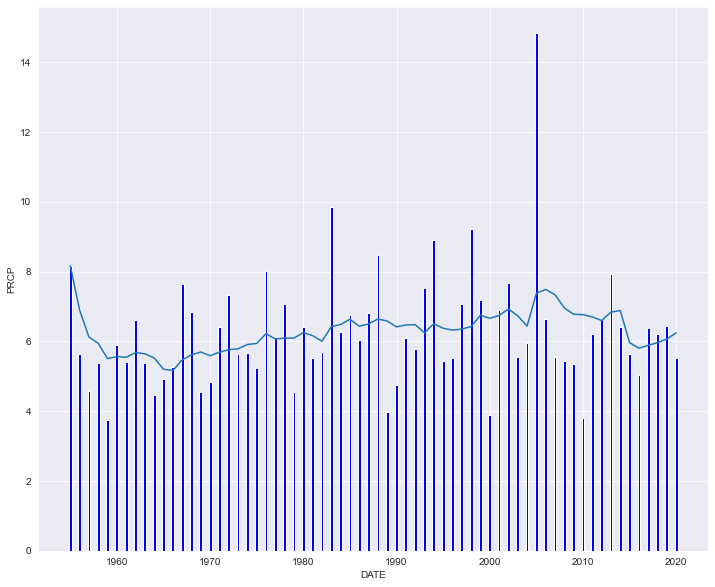

In [97]:
sns.set_style('darkgrid')
fig, ax2 = plt.subplots(figsize=(12, 10))
fig = plt.bar(difference.index, div_rain_by_days['PRCP'], width=0.3, color='blue')
ax2 = sns.lineplot(data = rolling, sort = False)

From the plot I can infer that there is a small upward tendency in the amount of water(precipication) in each rain as the time pass and maybe that's because the forest are being destroyed every year. I can also see that in 2005 the total precipication of the rainy days was awfully compare to the other years. Also the years 1955, 1962, 1967, 1968, 1971, 1972, 1976, 1978, 1983, 1988, 1993, 1994,1997, 1998, 1999, 2002, 2005 and 1013 the amount of water(precipication) is above the rolling_avarage and this means that in these years the total precipication from the rains was more than the avarage.